# Employee Retention Model

In [1]:
# Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

# Plots are displayed inline without needing to call 'plt.show()'
%matplotlib inline

### Import Data -

In [2]:
df=pd.read_csv('IBM-HR-Employee.csv')

In [3]:
df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.duplicated().sum()

0

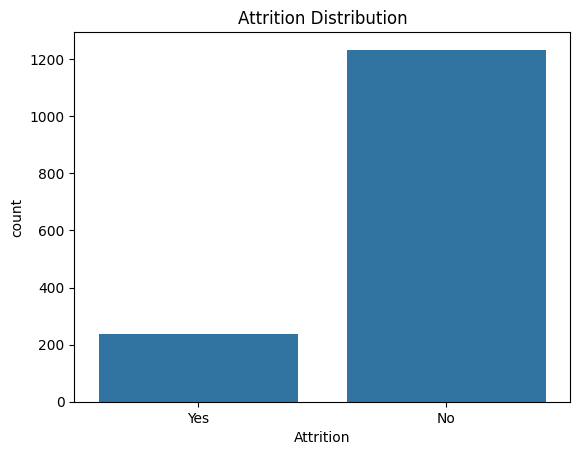

In [6]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

Attrition: "No" is much more than "Yes" → model may be biased toward "No". 

So, we should use SMOTE stands for Synthetic Minority Over-sampling Technique. It is used to solve the problem of imbalanced datasets. SMOTE should be applied only on the training data, after data preprocessing, and just before model training.

Data of Department might be covered by JobRole already. So, We can drop the Department column.

### Feature Selection - 

In [7]:
df.drop(columns=['EmployeeNumber','Education','JobLevel','Gender','Department',
                 'HourlyRate','EducationField', 'DailyRate', 'MonthlyRate', 'EmployeeCount',
                 'Over18', 'StandardHours'], inplace=True)
df_cat = df.select_dtypes(include=['object', 'category'])
df_num = df.select_dtypes(include=['int64', 'float64'])

Keep These Features - 

| Feature                   | Reason                                                                 |
|---------------------------|------------------------------------------------------------------------|
| Age                       | Younger employees often switch jobs more.                              |
| BusinessTravel            | Frequent travel can cause burnout.                                     |
| DistanceFromHome          | Long commute = less job satisfaction.                                  |
| EnvironmentSatisfaction   | Direct indicator of workplace happiness.                               |
| JobInvolvement            | Low involvement → higher attrition risk.                               |
| JobRole                   | Some roles may have higher turnover (e.g., Sales).                     |
| JobSatisfaction           | Unhappy employees are more likely to leave.                            |
| MaritalStatus             | Single vs. married may affect job change decisions.                    |
| MonthlyIncome             | Pay is a key factor in leaving/staying.                                |
| NumCompaniesWorked        | Job-hoppers likely to switch again.                                    |
| OverTime                  | Overtime can lead to burnout and attrition.                            |
| PercentSalaryHike         | Small hikes may frustrate employees.                                   |
| PerformanceRating         | Could be correlated with retention.                                    |
| RelationshipSatisfaction  | Affects emotional satisfaction at work.                                |
| StockOptionLevel          | Higher levels may reduce attrition.                                    |
| TotalWorkingYears         | More experienced workers may be more stable.                           |
| TrainingTimesLastYear     | Less training → employees feel stuck.                                  |
| WorkLifeBalance           | A top reason people leave.                                             |
| YearsAtCompany            | Very short or very long stays could indicate patterns.                 |
| YearsInCurrentRole        | Stagnant roles may trigger exits.                                      |
| YearsSinceLastPromotion   | Long gaps without promotion may push employees out.                    |
| YearsWithCurrManager      | Manager relationship heavily influences attrition.                     |


Drop These Features - 

| Feature           | Reason                                                       |
|-------------------|--------------------------------------------------------------|
| EmployeeCount     | Constant (always 1) → No predictive power.                   |
| EmployeeNumber    | Just an ID, no real-world meaning.                           |
| Education         | Too broad; EducationField is more specific and useful.       |
| Department        | Likely redundant with JobRole.                               |
| HourlyRate        | Redundant with MonthlyIncome.                                |
| DailyRate         | Redundant with MonthlyIncome.                                |
| MonthlyRate       | Redundant with MonthlyIncome.                                |
| Gender            | May introduce bias; avoid unless business-justified.         |
| Over18            | All values are "Y" → useless.                                |
| StandardHours     | Constant (always 80) → no variation.                         |
| JobLevel          | Overlaps with JobRole and MonthlyIncome.                     |
| EducationField    | This is not relevent for current performance.                |


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   JobInvolvement            1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  NumCompaniesWorked        1470 non-null   int64 
 11  OverTime                  1470 non-null   object
 12  PercentSalaryHike         1470 non-null   int64 
 13  PerformanceRating         1470 non-null   int64 
 14  RelationshipSatisfaction

### Numerical Column vs. Caterorical Column -

In [9]:
numerical_col= df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(include = object).columns
print(numerical_col)
print(categorical_col)

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['Attrition', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')


### Checking Outliers - 

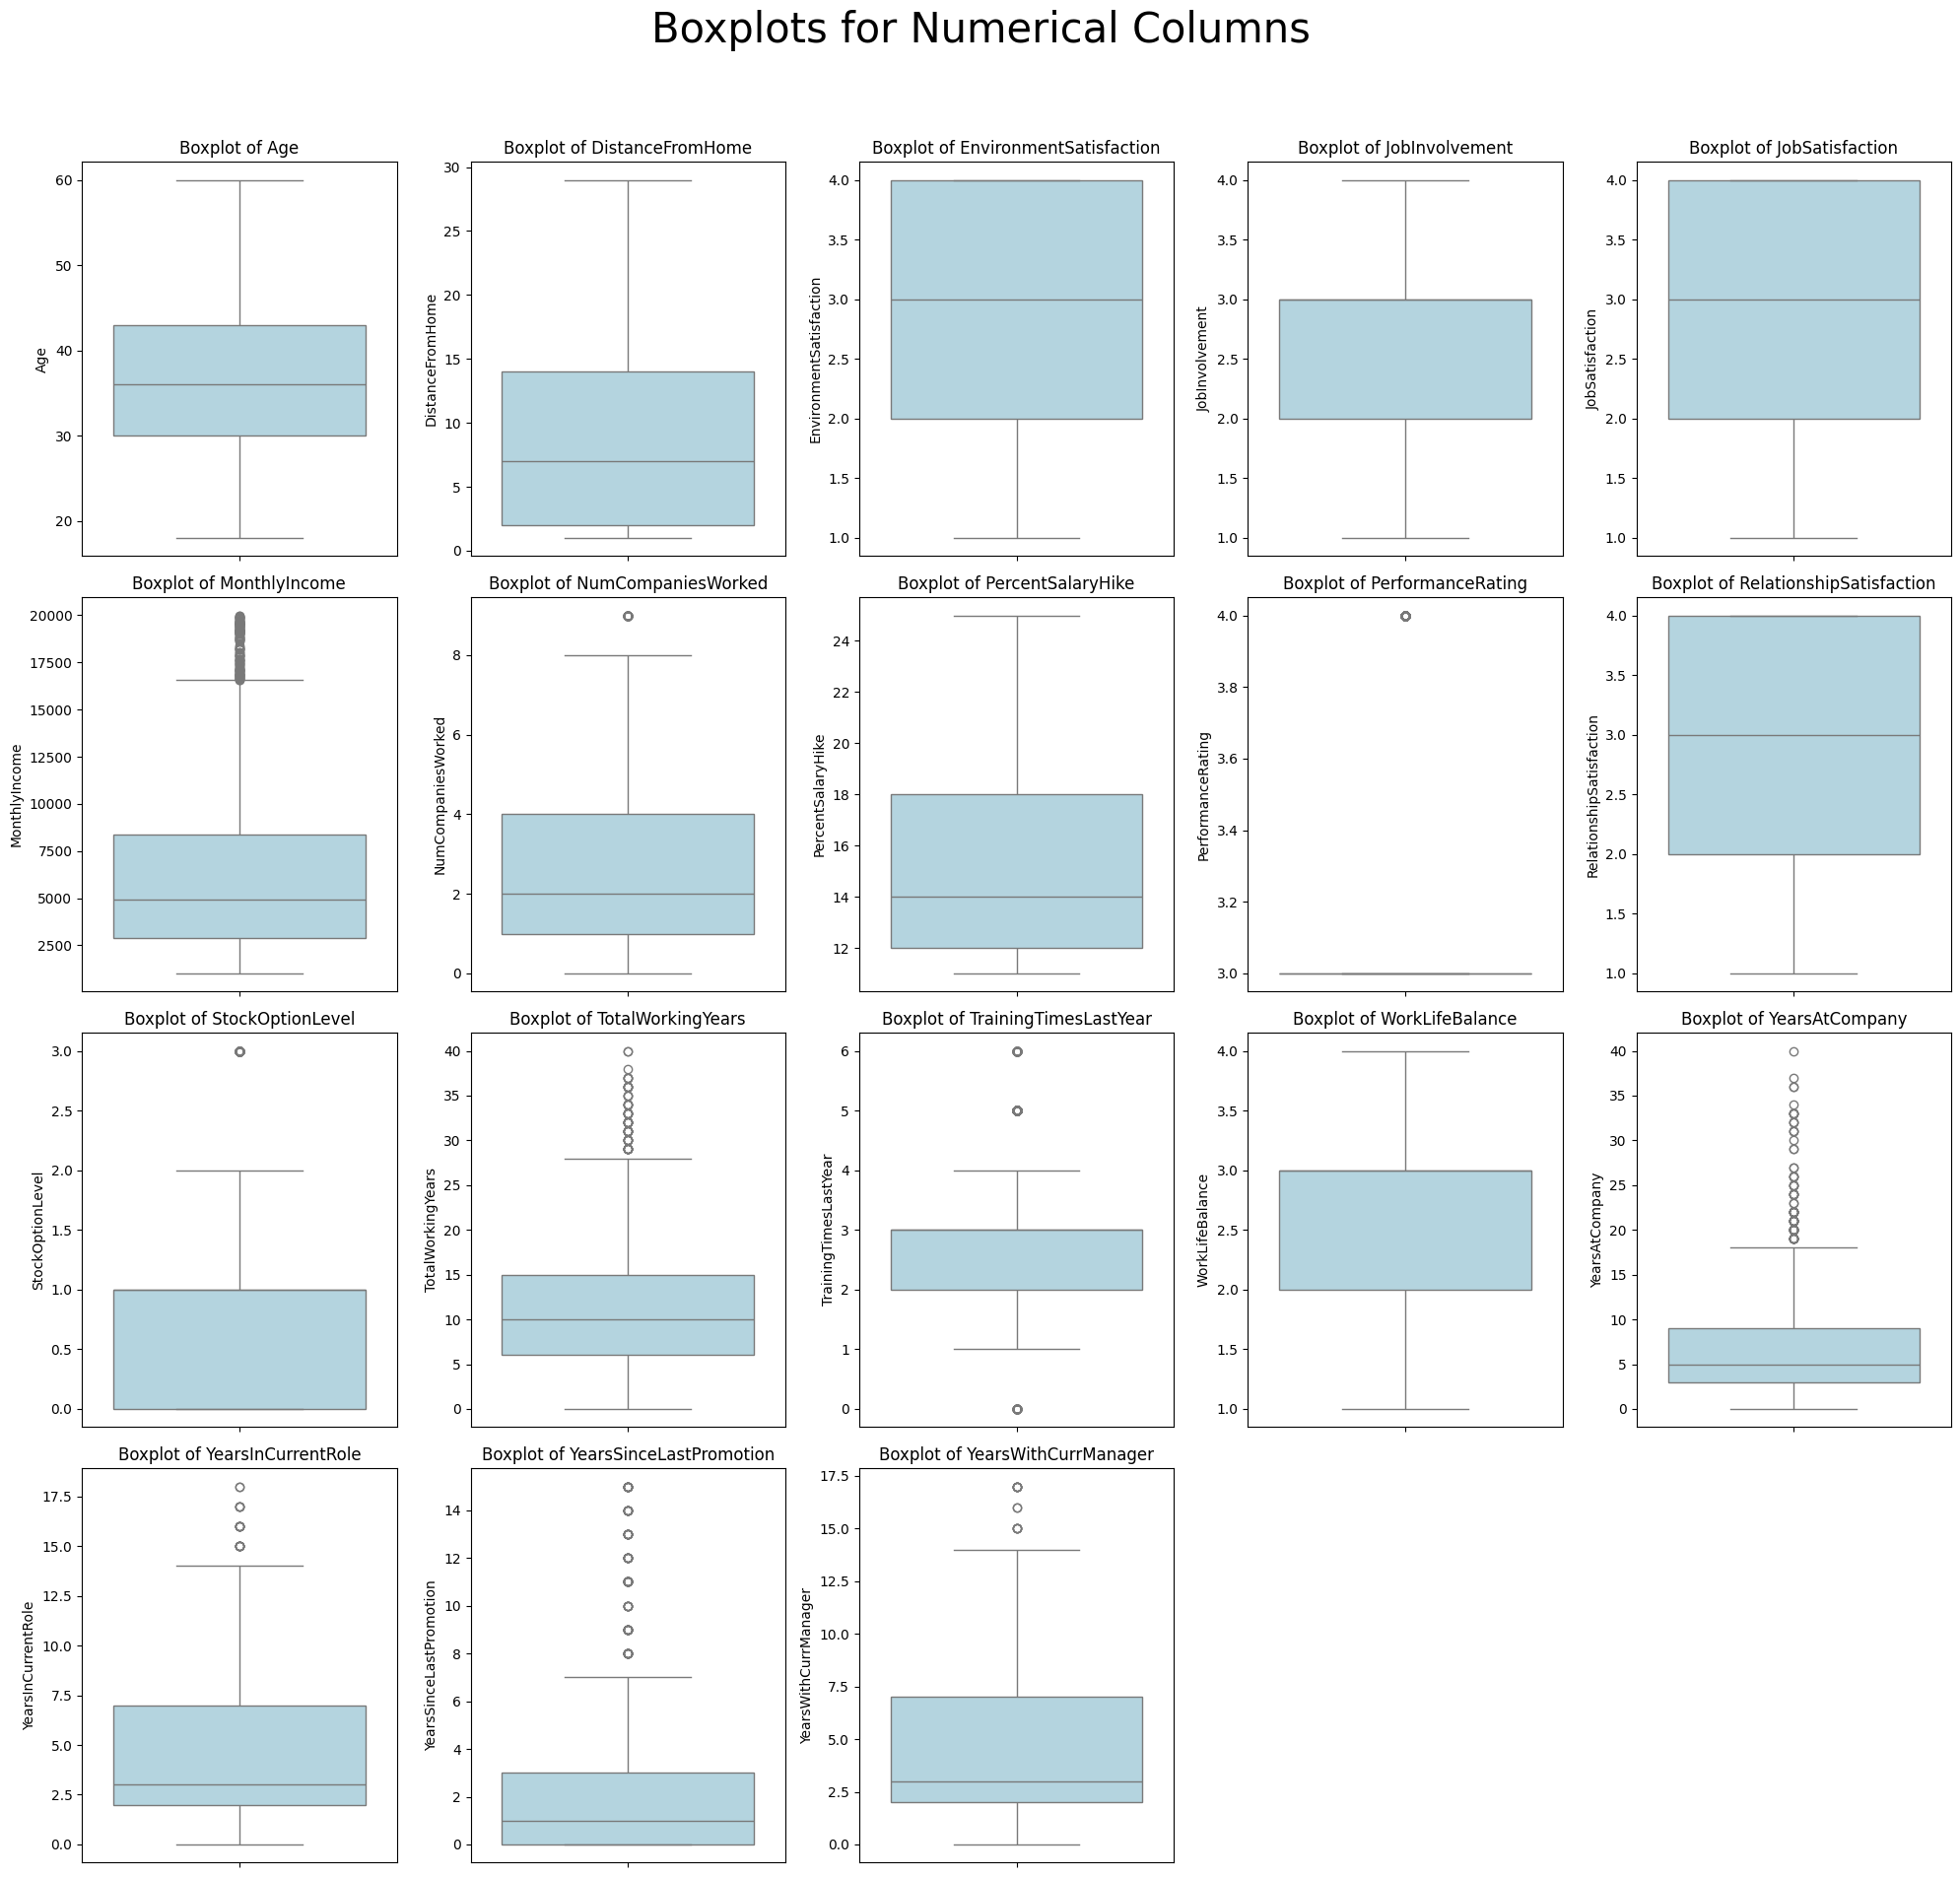

In [10]:
# Get numerical columns
numerical_features = df.select_dtypes(include='number').columns.tolist()

# Set layout for subplots
n_cols = 5
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

# Create subplot figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot each numerical column as a Seaborn boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a global title and adjust layout
plt.suptitle('Boxplots for Numerical Columns', fontsize=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We don't have large amount of data. So, we can not remove outliers. We can use "capping" for replace outliers with upper/lower threshold (e.g., 1.5×IQR limits).

### Remove Outliers (Using IQR Capping)

In [11]:
# Copy the original df to avoid modifying it directly
df_cleaned = df.copy()

# Loop through each numerical feature and cap the outliers
for col in numerical_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define capping thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers using np.where
    df_cleaned[col] = np.where(
        df_cleaned[col] < lower_bound, lower_bound,
        np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    )


Show What Was Capped - 

In [12]:
for col in numerical_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers capped")


Age: 0 outliers capped
DistanceFromHome: 0 outliers capped
EnvironmentSatisfaction: 0 outliers capped
JobInvolvement: 0 outliers capped
JobSatisfaction: 0 outliers capped
MonthlyIncome: 0 outliers capped
NumCompaniesWorked: 0 outliers capped
PercentSalaryHike: 0 outliers capped
PerformanceRating: 0 outliers capped
RelationshipSatisfaction: 0 outliers capped
StockOptionLevel: 0 outliers capped
TotalWorkingYears: 0 outliers capped
TrainingTimesLastYear: 0 outliers capped
WorkLifeBalance: 0 outliers capped
YearsAtCompany: 0 outliers capped
YearsInCurrentRole: 0 outliers capped
YearsSinceLastPromotion: 0 outliers capped
YearsWithCurrManager: 0 outliers capped


After Capping - 

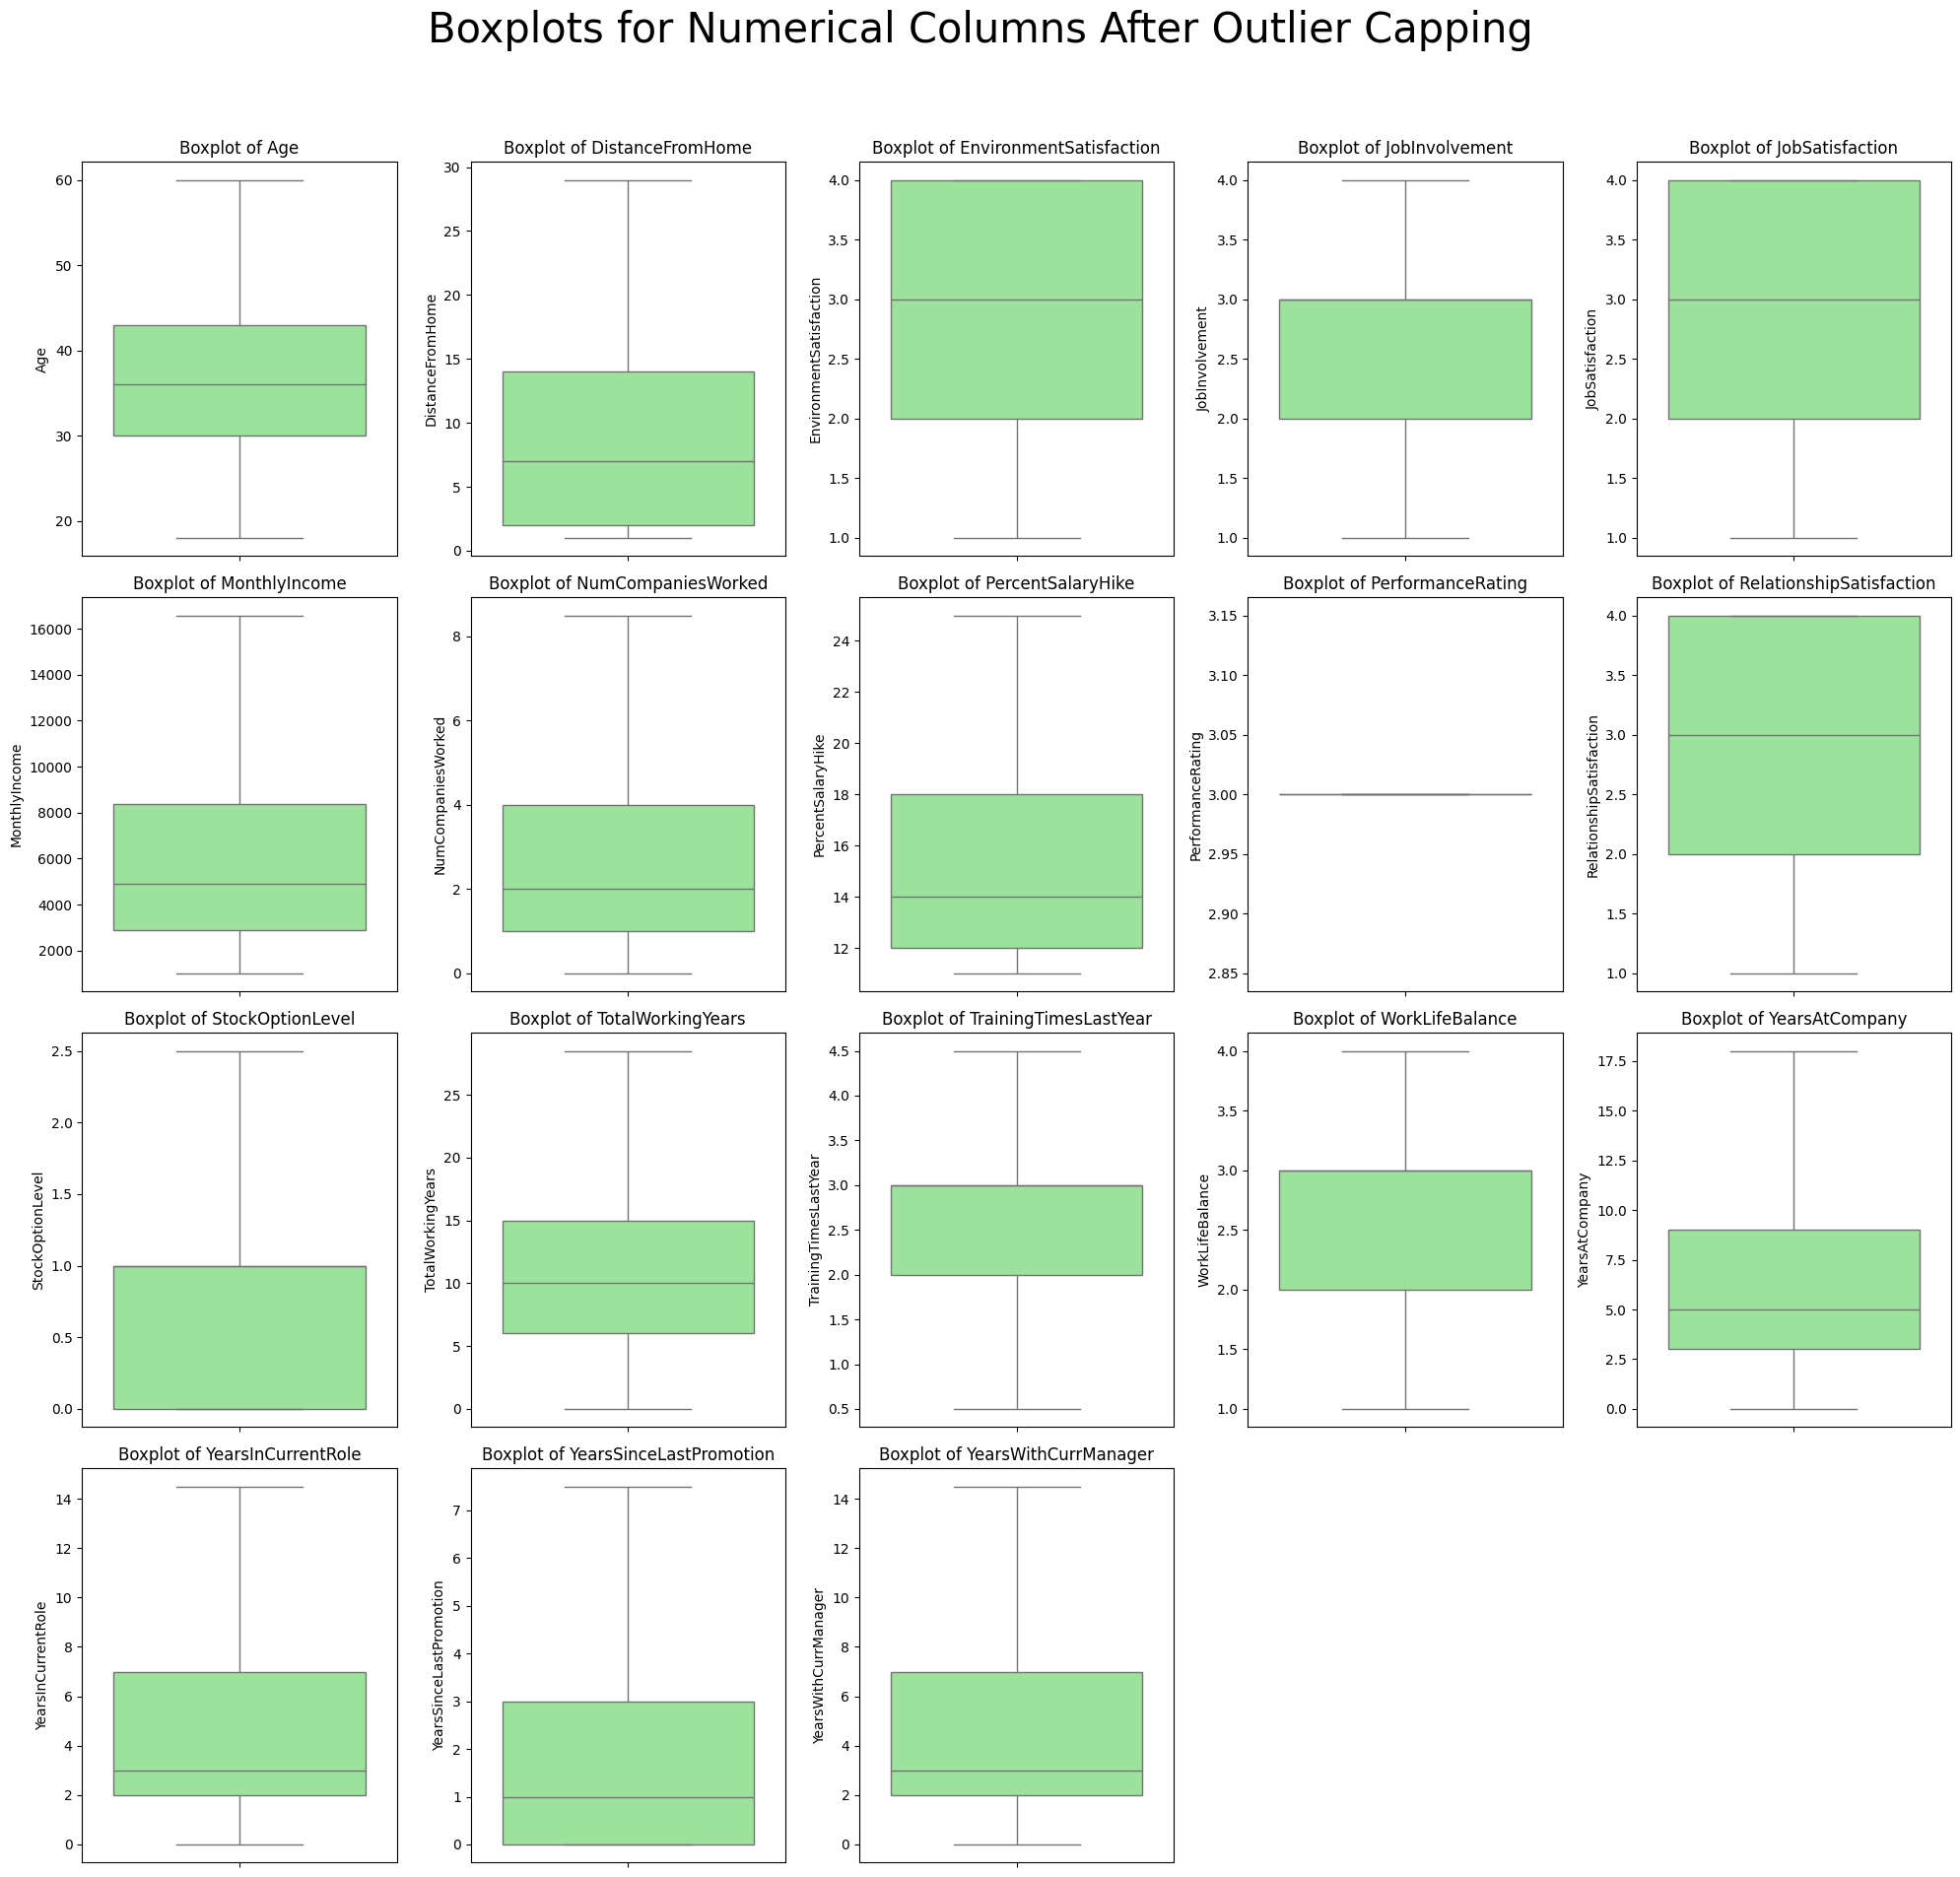

In [13]:
# Get numerical columns from the cleaned dataset
numerical_features = df_cleaned.select_dtypes(include='number').columns.tolist()

# Set layout for subplots
n_cols = 5
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

# Create subplot figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Plot each numerical column as a Seaborn boxplot
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df_cleaned[feature], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a global title and adjust layout
plt.suptitle('Boxplots for Numerical Columns After Outlier Capping', fontsize=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [14]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6361.891837,4353.345470,1009.0,2911.0,4919.0,8379.0,16581.0
NumCompaniesWorked,1470.0,2.675510,2.454656,0.0,1.0,2.0,4.0,8.5
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
PerformanceRating,1470.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
RelationshipSatisfaction,1470.0,2.712245,1.081209,1.0,2.0,3.0,4.0,4.0


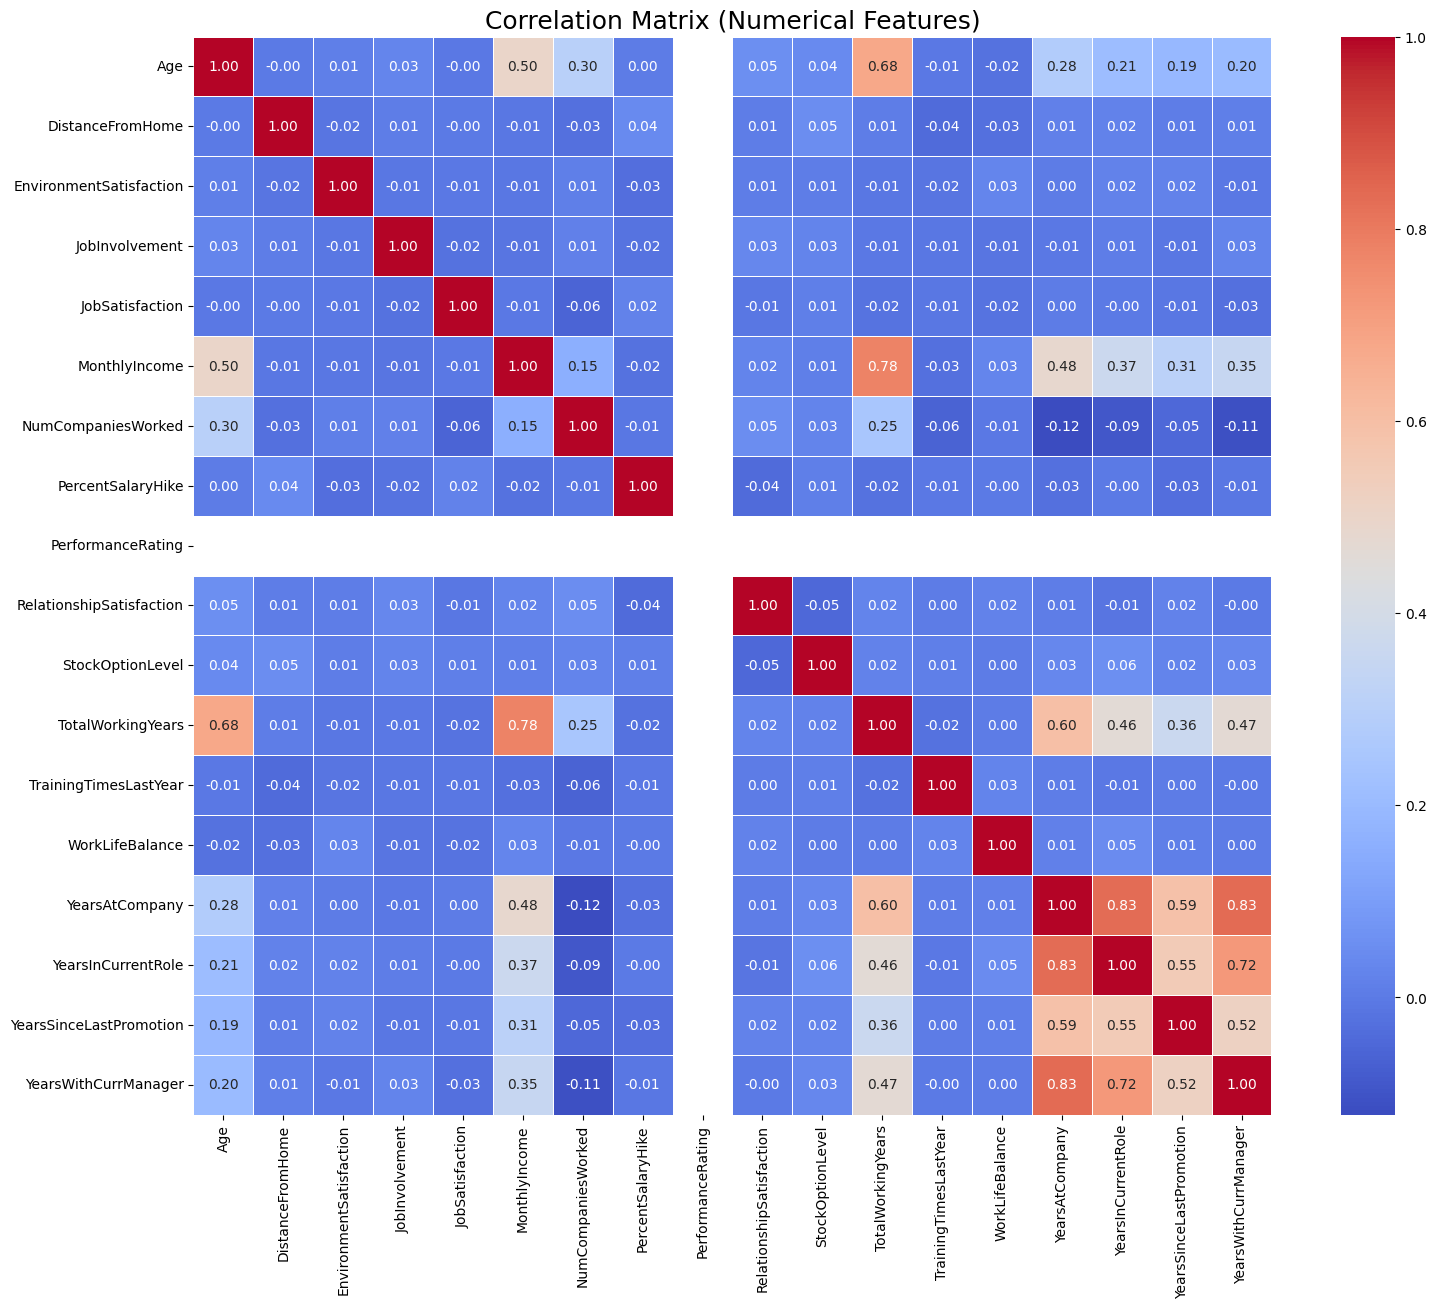

In [15]:
# Select only numeric columns from df (before encoding)
numeric_df = df_cleaned.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title('Correlation Matrix (Numerical Features)', fontsize=18)
plt.show()

Insights from the correlation matrix (displayed in cell 30):

1. Most correlations between features are weak (close to 0), indicating low multicollinearity.
2. Strongest positive correlations:
    - YearsAtCompany and YearsInCurrentRole: Employees who have been at the company longer tend to have spent more years in their current role.
    - YearsAtCompany and YearsWithCurrManager: Longer tenure at the company often means more years with the same manager.
    - TotalWorkingYears and Age: Older employees generally have more total working years.
    - YearsSinceLastPromotion and YearsAtCompany: Employees with longer tenure may have longer gaps since their last promotion.
3. Strongest negative correlations:
    - YearsInSameRoleRatio and RecentlyPromoted: Employees recently promoted have a lower ratio of years in the same role.
    - YearsSinceLastPromotion and RecentlyPromoted: Recently promoted employees have a value of 0 for years since last promotion.
4. MonthlyIncome has a moderate positive correlation with TotalWorkingYears and Age, suggesting more experienced and older employees earn higher salaries.
5. No pairs of features are highly correlated (above 0.8), so multicollinearity is not a major concern for most models.
6. Attrition (if included) would likely show negative correlation with features like MonthlyIncome, JobSatisfaction, and YearsAtCompany, indicating employees with lower values in these features are more likely to leave.

Overall: The features are mostly independent, with a few logical relationships (tenure, age, income). This is good for modeling, as redundant features are minimal.

### Univarite Analysis of all Neumerical collumn

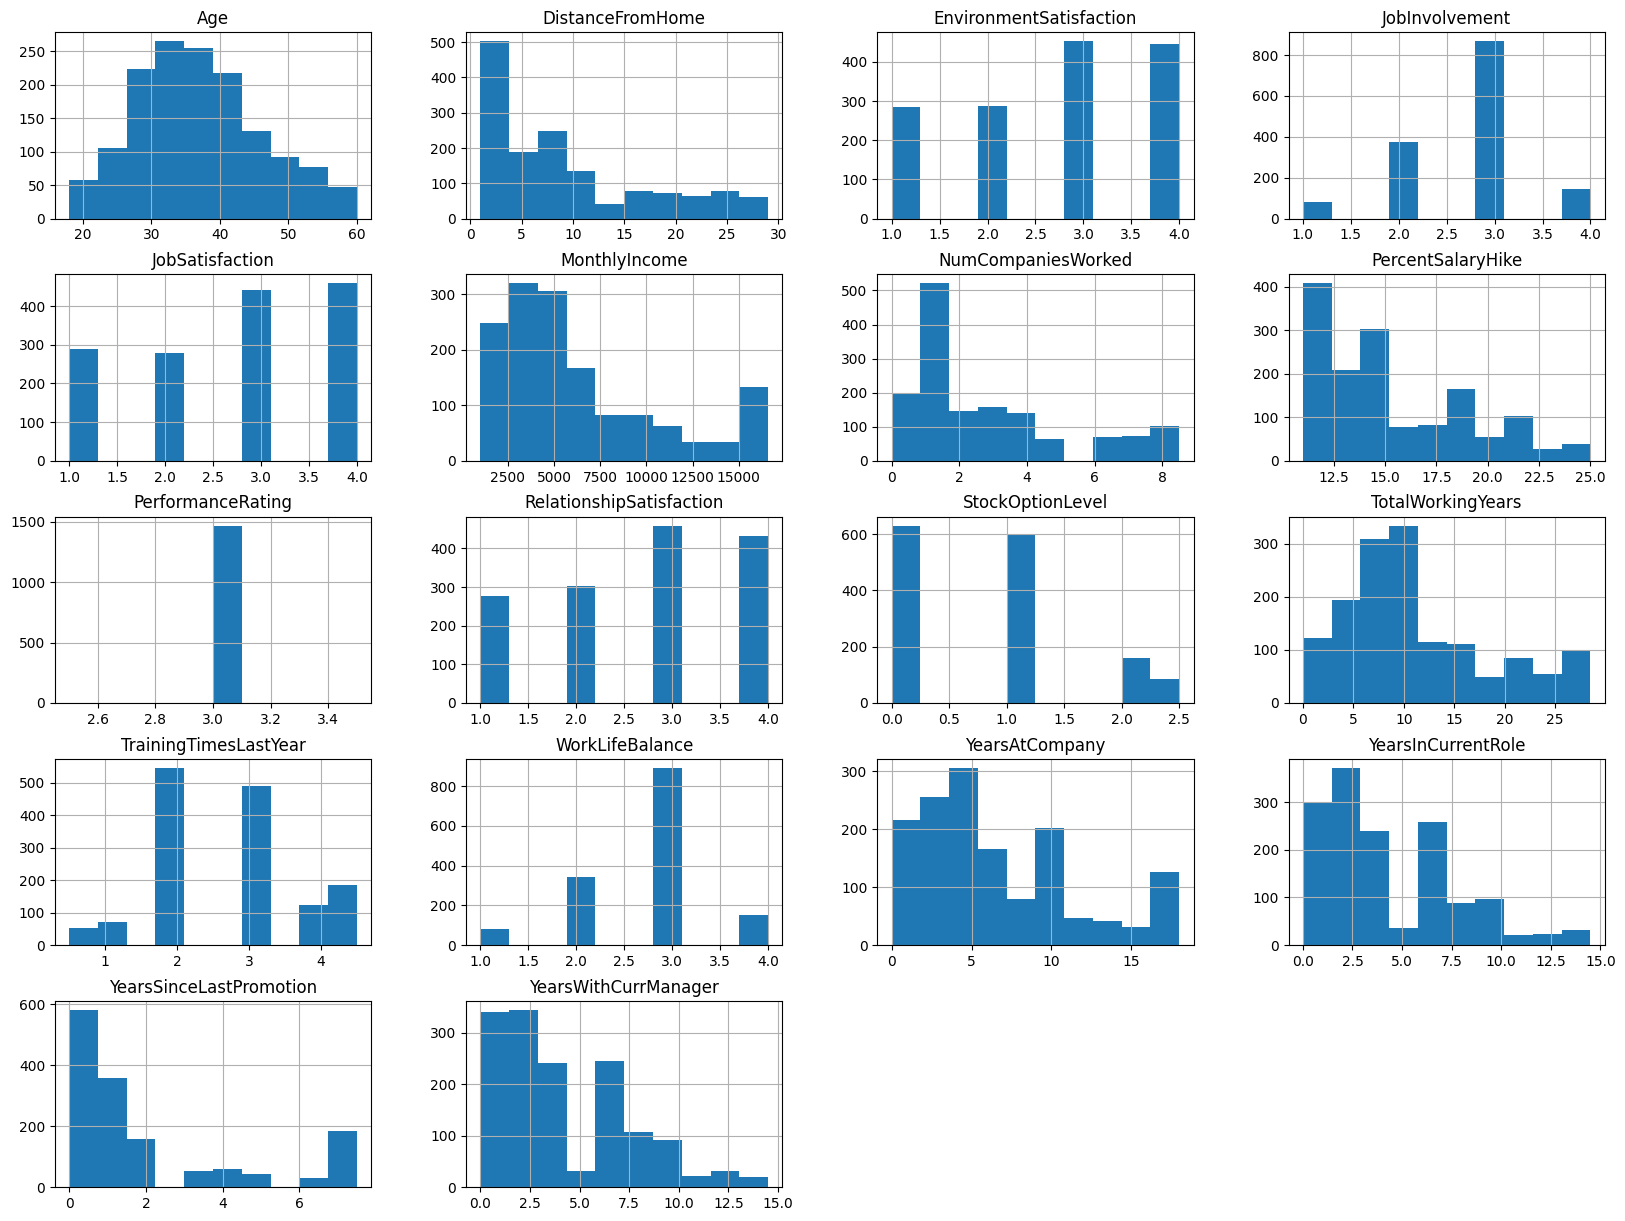

In [16]:
df_cleaned.hist(figsize=(20, 15), bins=10);
plt.show()

### Univariate Analysis Insights

- **Age**: The distribution is slightly right-skewed, with most employees in their 30s and 40s. Few employees are at the youngest and oldest ends.
- **DistanceFromHome**: Most employees live close to work, but a small number commute long distances.
- **EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction**: These satisfaction scores are fairly evenly distributed, but there is a slight concentration at higher satisfaction levels.
- **JobInvolvement**: Most employees report moderate to high involvement in their jobs.
- **MonthlyIncome**: The distribution is right-skewed, indicating a majority of employees earn lower to mid-range salaries, with a few high earners.
- **NumCompaniesWorked**: Many employees have worked at only a few companies, but some have switched jobs frequently.
- **PercentSalaryHike**: Most employees receive moderate salary hikes, with fewer receiving very high increases.
- **PerformanceRating**: Most employees have high performance ratings, suggesting a possible rating inflation or a high-performing workforce.
- **StockOptionLevel**: The majority of employees have low or no stock options, with fewer at higher levels.
- **TotalWorkingYears**: The distribution is right-skewed, with most employees having less than 20 years of experience.
- **TrainingTimesLastYear**: Most employees received a small number of training sessions, with very few receiving extensive training.
- **WorkLifeBalance**: Most employees rate their work-life balance as good or excellent.
- **YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager**: These features are right-skewed, indicating most employees are relatively new to their company, role, or manager, and have not been promoted recently.

**Overall:** The dataset shows a workforce that is generally satisfied, moderately experienced, and stable, but with some outliers in income, tenure, and satisfaction. Most features are right-skewed, reflecting a concentration of employees at lower values for tenure and income.

### Univarite Analysis of all Catagorical collumn - 

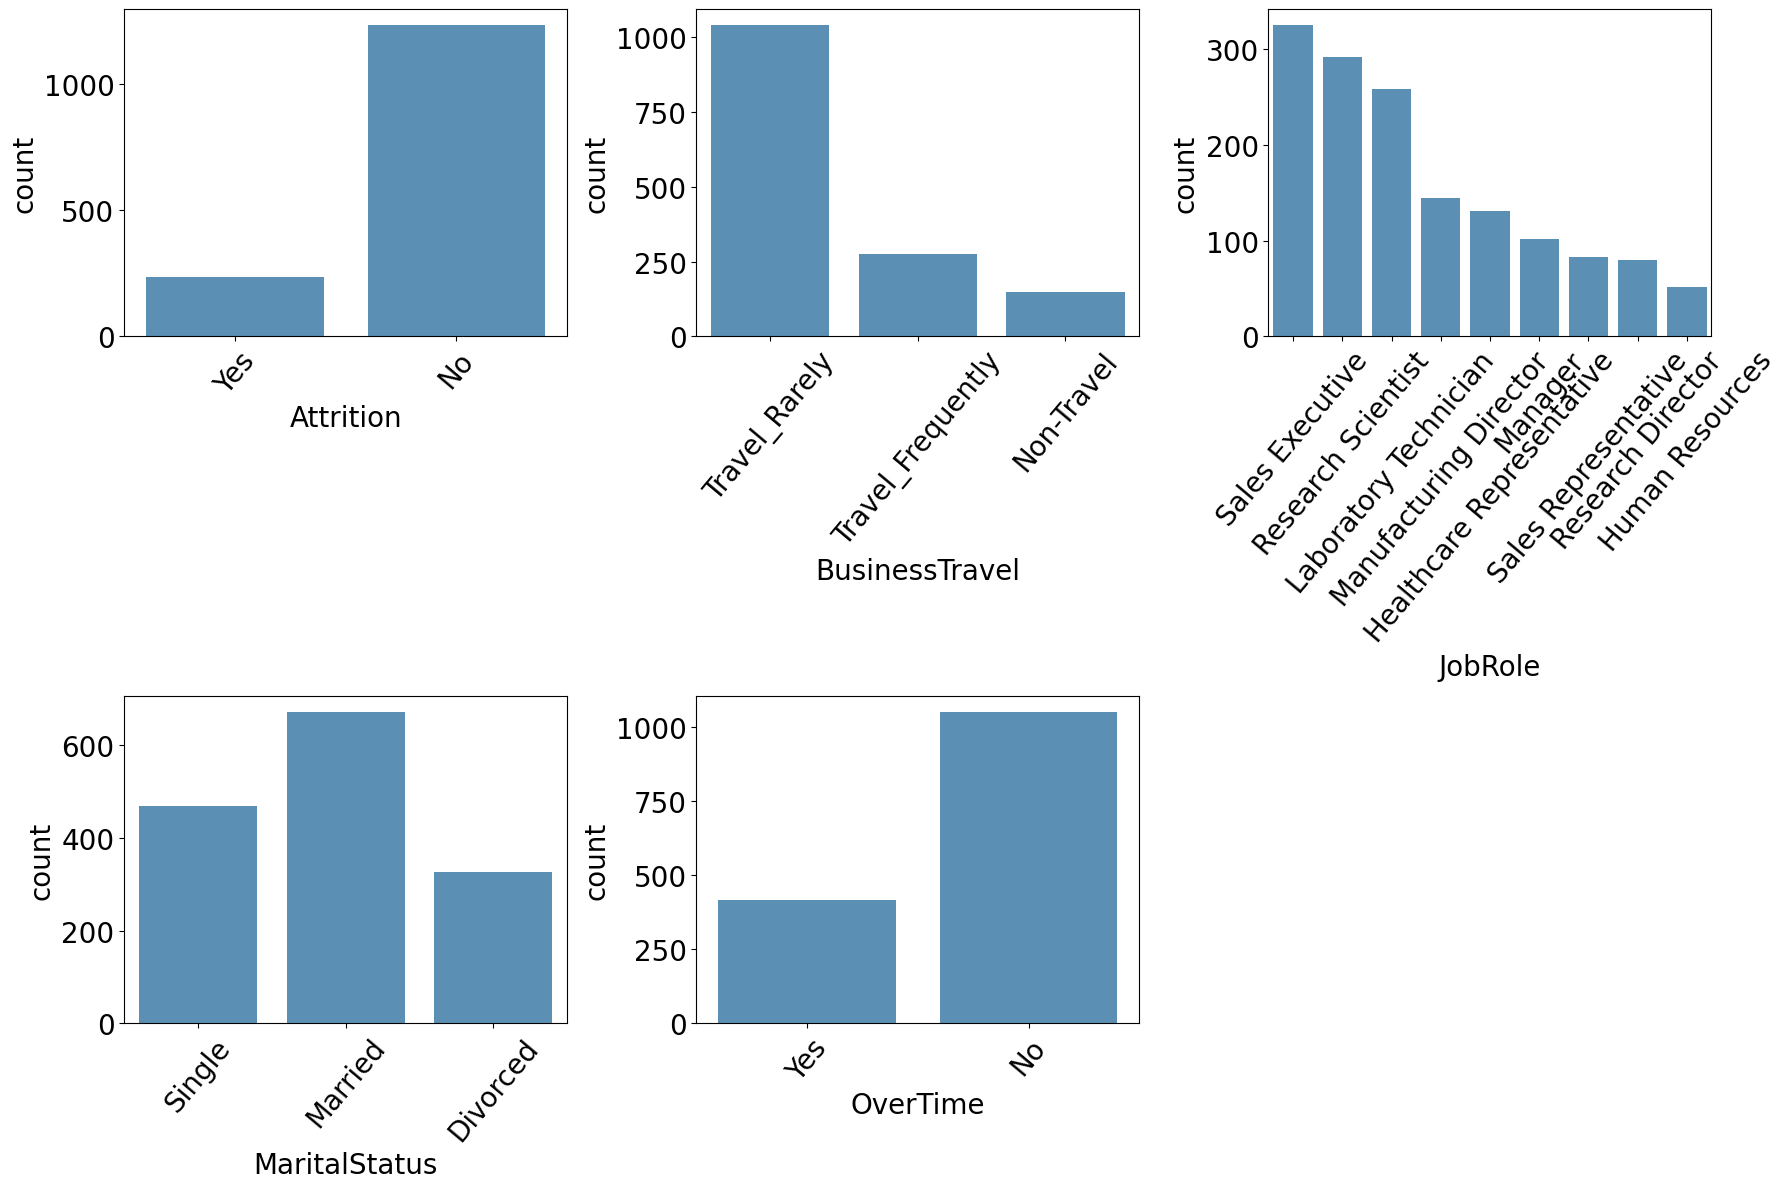

In [17]:
def plot_cate(df_cleaned, ax_width=6, ax_height=6, angle=50, n_cols=4, size=20):
    import math
    df_cat = df_cleaned.select_dtypes(include=['object', 'category'])
    n_rows = math.ceil(len(df_cat.columns)/n_cols)
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(ax_width * n_cols, ax_height * n_rows))
    for i, chart in enumerate(ax.flatten()): # Or enumerate(fig.axes)
        if i < len(df_cat.columns):
            sns.countplot(x=df_cat.iloc[:, i], ax=chart, alpha=0.8)
            chart.tick_params(axis='x', rotation=angle, labelsize=size)
            chart.tick_params(axis='y', labelsize=size)
            chart.xaxis.label.set_size(size)
            chart.yaxis.label.set_size(size)
        else:
            chart.set_visible(False)  # Hide the empty axes
    plt.tight_layout()
plot_cate(df, n_cols=3)
plt.show()

### Univariate Analysis Insights for Categorical Columns

- **BusinessTravel**: Most employees travel rarely for business, with fewer traveling frequently or regularly. Frequent travel may be associated with higher attrition.
- **JobRole**: Roles such as Sales Executive and Research Scientist are most common, while roles like Healthcare Representative and Human Resources are less represented.
- **MaritalStatus**: Most employees are either married or single, with a smaller proportion divorced.
- **OverTime**: A significant number of employees work overtime, which could contribute to burnout and attrition.
- **Attrition**: The dataset is imbalanced, with many more employees staying ("No") than leaving ("Yes").

**Overall:**  
The categorical features show that the workforce is concentrated in certain job roles and education fields, with a notable portion working overtime. Imbalances in categories (e.g., Attrition, BusinessTravel) should be considered in further analysis and modeling.

### Bivariate Analysis -
Numerical feature vs. Attrition -

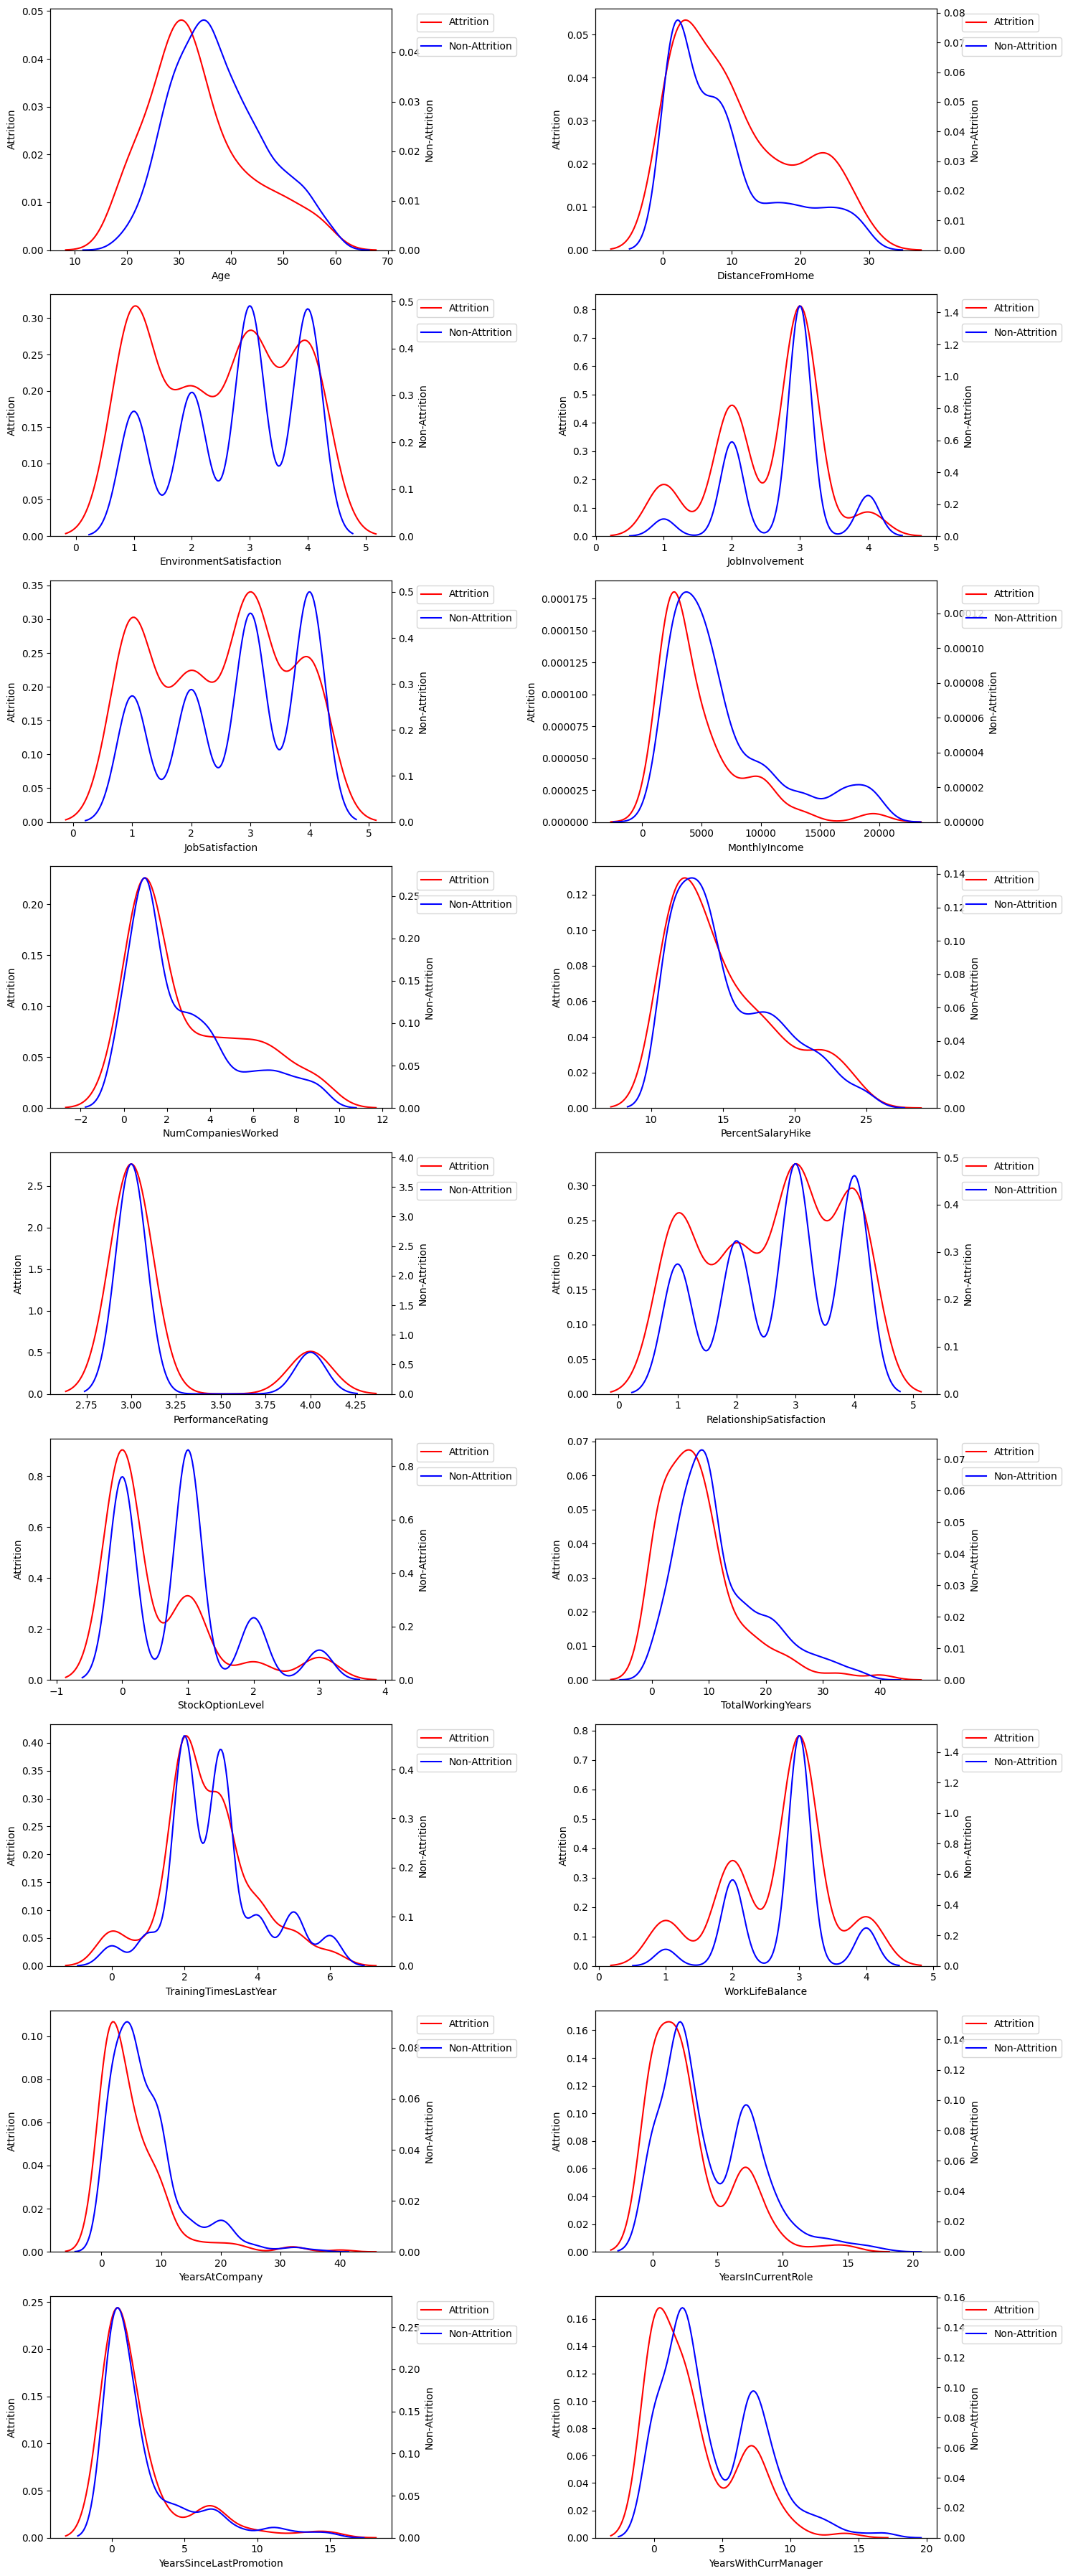

In [18]:
# With KDE plot
df_y = df_num[df_cleaned['Attrition'] == 'Yes']
df_n = df_num[df_cleaned['Attrition'] == 'No']
no_ax = len(df_num.columns)
plt.figure(figsize=(15, 2*no_ax))

for i in range(no_ax):
    ax1 = plt.subplot(round(no_ax/2), 2, i+1)

    # Plotting for non-fraudulent transactions
    sns.kdeplot(df_y.iloc[:, i], color='red', label='Attrition', ax=ax1)
    ax1.set_ylabel('Attrition')

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plotting for fraudulent transactions
    sns.kdeplot(df_n.iloc[:, i], color='blue', label='Non-Attrition', ax=ax2)
    ax2.set_ylabel('Non-Attrition')

    # Add legends for both plots
    ax1.legend(loc='upper left', bbox_to_anchor=(1.06, 1))
    ax2.legend(loc='upper left', bbox_to_anchor=(1.06, 0.9))

    plt.tight_layout()

### Insights: Numerical Feature vs. Attrition (KDE Plots)

- **Age**: Employees who left ("Attrition") tend to be younger compared to those who stayed. The density for attrition is higher at lower ages.
- **DistanceFromHome**: Employees with higher attrition are slightly more likely to live farther from work, but the difference is not very pronounced.
- **EnvironmentSatisfaction, JobSatisfaction, RelationshipSatisfaction**: Employees who left generally have lower satisfaction scores, indicating dissatisfaction is linked to attrition.
- **JobInvolvement**: Lower job involvement is associated with higher attrition.
- **MonthlyIncome**: Employees with lower monthly income are more likely to leave, while those with higher income tend to stay.
- **NumCompaniesWorked**: Employees who have worked at more companies previously are more likely to leave, suggesting job-hopping behavior.
- **PercentSalaryHike**: No significant difference between groups, but slightly higher hikes may reduce attrition.
- **PerformanceRating**: Both groups have similar distributions, indicating performance rating is not a strong differentiator.
- **StockOptionLevel**: Employees with no or low stock options are more likely to leave.
- **TotalWorkingYears**: Employees with fewer total working years are more likely to leave.
- **TrainingTimesLastYear**: No strong pattern, but those with less training may have slightly higher attrition.
- **WorkLifeBalance**: Employees with lower work-life balance scores are more likely to leave.
- **YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager**: Employees with shorter tenure at the company, in their current role, since last promotion, or with their current manager are more likely to leave.

**Overall:**  
Attrition is higher among younger, less experienced, less satisfied, lower-paid employees, and those with less tenure or weaker work-life balance. Satisfaction and tenure-related features are strong indicators of attrition risk.

Categorical features vs. Attrition-

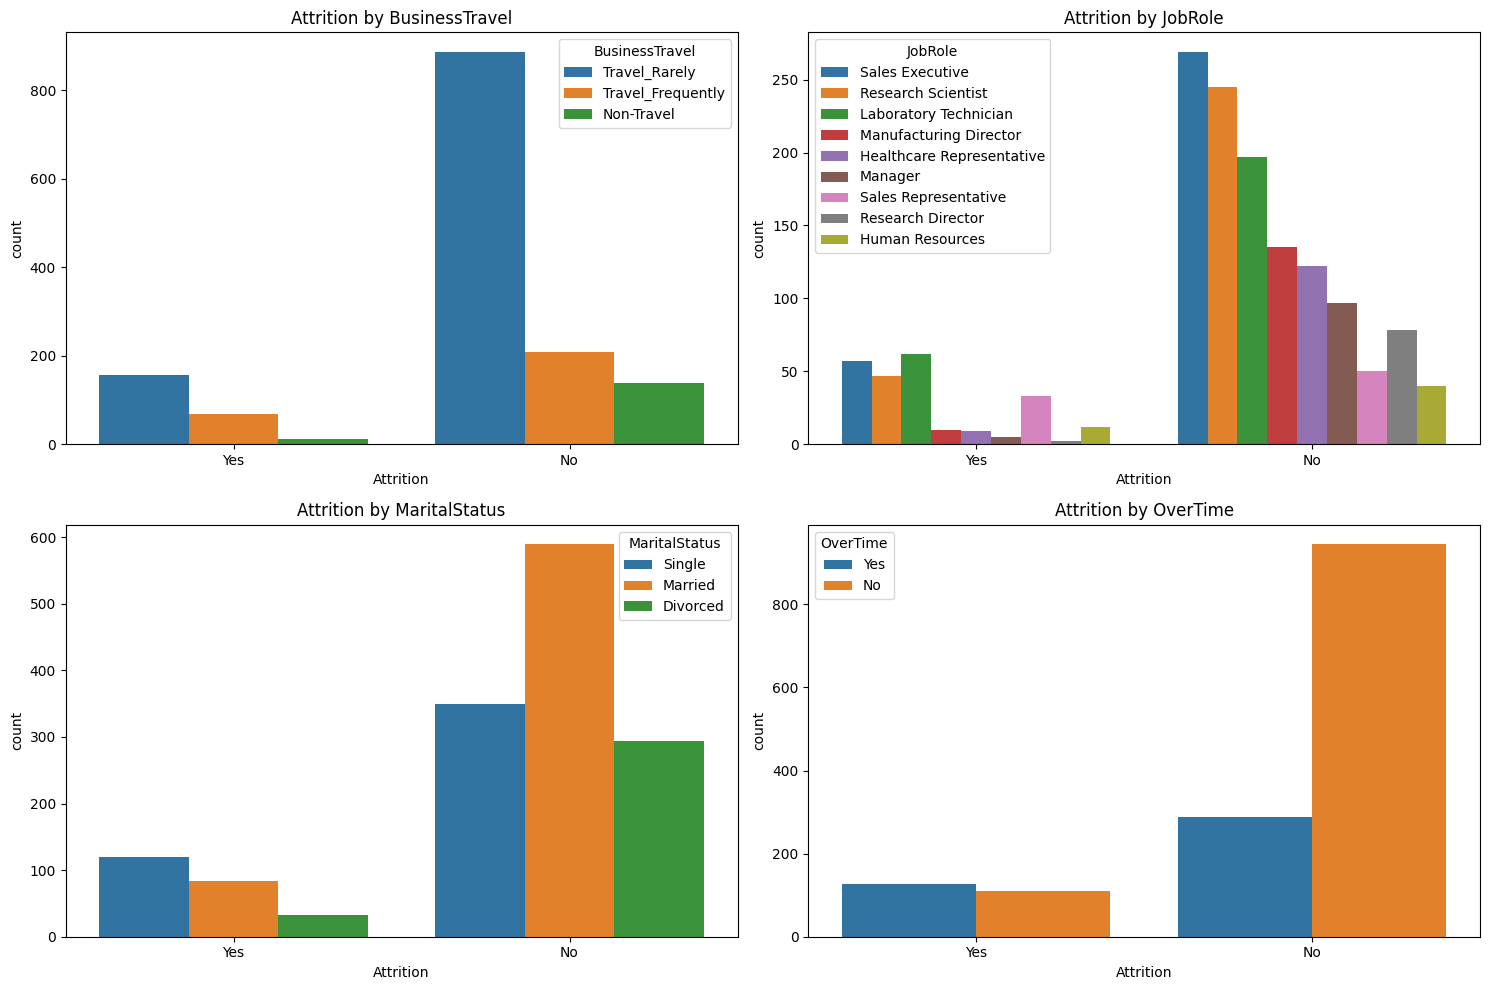

In [19]:
df_cat = df_cat.drop(columns=['Attrition'])

# Number of features per page
n_rows, n_cols = 2, 2
plots_per_page = n_rows * n_cols

# Total number of plots
total_features = len(df_cat.columns)

# Loop through in chunks of 4
for i in range(0, total_features, plots_per_page):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    axes = axes.flatten()

    for j, feature in enumerate(df_cat.columns[i:i + plots_per_page]):
        sns.countplot(x=df['Attrition'], hue=df_cat[feature], ax=axes[j])
        axes[j].set_title(f'Attrition by {feature}')

    # Hide any extra subplots
    for k in range(j + 1, len(axes)):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.show()

### Insights: Categorical Feature vs. Attrition

- **BusinessTravel**: Employees who travel frequently for business have a higher proportion of attrition compared to those who travel rarely or occasionally. Frequent travel may contribute to burnout or dissatisfaction, leading to higher turnover.

- **JobRole**: Certain job roles, such as Sales Executive and Laboratory Technician, show higher attrition rates, while roles like Manager and Research Director have lower attrition. This suggests that job function and responsibilities influence employee retention.

- **MaritalStatus**: Single employees tend to have a higher attrition rate compared to married or divorced employees. This may indicate that marital status, possibly reflecting life stability or external responsibilities, impacts the likelihood of leaving the company.

- **OverTime**: Employees who work overtime are much more likely to leave than those who do not. Overtime work is a strong indicator of attrition, likely due to increased stress and poor work-life balance.

**Overall:**  
Attrition is notably higher among employees who travel frequently, work overtime, are single, or are in certain job roles. These categorical features are important predictors for employee turnover and should be considered in retention strategies and modeling.

In [20]:
df_cleaned.head().T

,0,1,2,3,4
Age,41.0,49.0,37.0,33.0,27.0
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DistanceFromHome,1.0,8.0,2.0,3.0,2.0
EnvironmentSatisfaction,2.0,3.0,4.0,4.0,1.0
JobInvolvement,3.0,2.0,2.0,3.0,3.0
JobRole,Sales Executive,Research Scientist,Laboratory Technician,Research Scientist,Laboratory Technician
JobSatisfaction,4.0,2.0,3.0,3.0,2.0
MaritalStatus,Single,Married,Single,Married,Married
MonthlyIncome,5993.0,5130.0,2090.0,2909.0,3468.0


In [21]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df_cleaned.copy()
label_cols = ['Attrition', 'OverTime']  # Gender not present in your data

le = LabelEncoder()
for col in label_cols:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

print("🔹 After Label Encoding:")
print(df_label_encoded.head().T)


🔹 After Label Encoding:
                                        0                   1  \
Age                                  41.0                49.0   
Attrition                               1                   0   
BusinessTravel              Travel_Rarely   Travel_Frequently   
DistanceFromHome                      1.0                 8.0   
EnvironmentSatisfaction               2.0                 3.0   
JobInvolvement                        3.0                 2.0   
JobRole                   Sales Executive  Research Scientist   
JobSatisfaction                       4.0                 2.0   
MaritalStatus                      Single             Married   
MonthlyIncome                      5993.0              5130.0   
NumCompaniesWorked                    8.0                 1.0   
OverTime                                1                   0   
PercentSalaryHike                    11.0                23.0   
PerformanceRating                     3.0                 3.0   
R

LabelEncoder is used to convert categorical variables with two classes (like 'Attrition' and 'OverTime')
into numeric values (0 and 1). Many machine learning algorithms require input features to be numeric,
and LabelEncoder provides a simple way to encode binary categorical columns without creating extra columns.
This is especially useful for target variables or binary features.

In [22]:
df_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   object 
 3   DistanceFromHome          1470 non-null   float64
 4   EnvironmentSatisfaction   1470 non-null   float64
 5   JobInvolvement            1470 non-null   float64
 6   JobRole                   1470 non-null   object 
 7   JobSatisfaction           1470 non-null   float64
 8   MaritalStatus             1470 non-null   object 
 9   MonthlyIncome             1470 non-null   float64
 10  NumCompaniesWorked        1470 non-null   float64
 11  OverTime                  1470 non-null   int32  
 12  PercentSalaryHike         1470 non-null   float64
 13  PerformanceRating         1470 non-null   float64
 14  Relation

In [23]:
one_hot_cols = ['BusinessTravel', 'JobRole', 'MaritalStatus']
df_final_encoded = pd.get_dummies(df_label_encoded, columns=one_hot_cols, drop_first=True)

print("\n🔹 After One-Hot Encoding:")
print(df_final_encoded.head().T)



🔹 After One-Hot Encoding:
                                       0       1       2       3       4
Age                                 41.0    49.0    37.0    33.0    27.0
Attrition                              1       0       1       0       0
DistanceFromHome                     1.0     8.0     2.0     3.0     2.0
EnvironmentSatisfaction              2.0     3.0     4.0     4.0     1.0
JobInvolvement                       3.0     2.0     2.0     3.0     3.0
JobSatisfaction                      4.0     2.0     3.0     3.0     2.0
MonthlyIncome                     5993.0  5130.0  2090.0  2909.0  3468.0
NumCompaniesWorked                   8.0     1.0     6.0     1.0     8.5
OverTime                               1       0       1       1       0
PercentSalaryHike                   11.0    23.0    15.0    11.0    12.0
PerformanceRating                    3.0     3.0     3.0     3.0     3.0
RelationshipSatisfaction             1.0     4.0     2.0     3.0     4.0
StockOptionLevel        

One-hot encoding is used to convert categorical variables with more than two categories into a format that can be provided to machine learning algorithms. Many algorithms require numerical input and cannot work directly with text labels. One-hot encoding creates new binary columns for each category, indicating the presence (1) or absence (0) of that category in each observation. This avoids introducing ordinal relationships where none exist and ensures that the model treats each category as distinct and unrelated.

In [24]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1470 non-null   float64
 1   Attrition                         1470 non-null   int32  
 2   DistanceFromHome                  1470 non-null   float64
 3   EnvironmentSatisfaction           1470 non-null   float64
 4   JobInvolvement                    1470 non-null   float64
 5   JobSatisfaction                   1470 non-null   float64
 6   MonthlyIncome                     1470 non-null   float64
 7   NumCompaniesWorked                1470 non-null   float64
 8   OverTime                          1470 non-null   int32  
 9   PercentSalaryHike                 1470 non-null   float64
 10  PerformanceRating                 1470 non-null   float64
 11  RelationshipSatisfaction          1470 non-null   float64
 12  StockO

In [25]:
# Convert all boolean (True/False) values in the DataFrame to integers (1/0)
df_final_encoded = df_final_encoded.astype(int)


In [26]:
df_final_encoded.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,1,0,1,0,0
DistanceFromHome,1,8,2,3,2
EnvironmentSatisfaction,2,3,4,4,1
JobInvolvement,3,2,2,3,3
JobSatisfaction,4,2,3,3,2
MonthlyIncome,5993,5130,2090,2909,3468
NumCompaniesWorked,8,1,6,1,8
OverTime,1,0,1,1,0
PercentSalaryHike,11,23,15,11,12


In [27]:
df_final_encoded.shape

(1470, 32)

### Split training and testing data - 

In [28]:
X = df_final_encoded.drop('Attrition', axis=1)
y = df_final_encoded['Attrition']

In [29]:
X

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,3,4,5993,8,1,11,3,...,0,0,0,0,0,0,1,0,0,1
1,49,8,3,2,2,5130,1,0,23,3,...,0,0,0,0,0,1,0,0,1,0
2,37,2,4,2,3,2090,6,1,15,3,...,0,1,0,0,0,0,0,0,0,1
3,33,3,4,3,3,2909,1,1,11,3,...,0,0,0,0,0,1,0,0,1,0
4,27,2,1,3,2,3468,8,0,12,3,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,3,4,4,2571,4,0,17,3,...,0,1,0,0,0,0,0,0,1,0
1466,39,6,4,2,1,9991,4,0,15,3,...,0,0,0,0,0,0,0,0,1,0
1467,27,4,2,4,2,6142,1,1,20,3,...,0,0,0,1,0,0,0,0,1,0
1468,49,2,4,2,2,5390,2,0,14,3,...,0,0,0,0,0,0,1,0,1,0


In [30]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [31]:
X.shape, y.shape

((1470, 31), (1470,))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [33]:
X_train.value_counts()

Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  JobRole_Sales Executive  JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single
18   1                 4                        3               4                1611           1                   0         15                 3                  3                         0                 0                  4                      4                0               0                   0                       

In [34]:
X_test.value_counts()

Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  JobRole_Sales Executive  JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single
18   10                4                        2               3                1200           1                   0         12                 3                  1                         0                 0                  2                      3                0               0                   0                       

In [35]:
y_train.value_counts()

Attrition
0    986
1    190
Name: count, dtype: int64

In [36]:
y_test.value_counts()

Attrition
0    247
1     47
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler

# Apply Standardization after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit + transform only on training
X_test_scaled = scaler.transform(X_test)         # transform test with same scaler

In [38]:
# Convert scaled arrays back to DataFrames with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Show first 5 rows of scaled training data
print("🔹 Scaled X_train:")
print(X_train_scaled_df.head().head().T)

# Show first 5 rows of scaled test data
print("\n🔹 Scaled X_test:")
print(X_test_scaled_df.head().head().T)

🔹 Scaled X_train:
                                         0         1         2         3  \
Age                               1.090194 -1.634828  0.981193 -1.307825   
DistanceFromHome                 -0.899915 -0.899915 -0.777610  0.445433   
EnvironmentSatisfaction          -0.658710  0.260202 -1.577622 -0.658710   
JobInvolvement                    1.795282  0.373564  0.373564  0.373564   
JobSatisfaction                  -0.647997  1.153526  0.252765  0.252765   
MonthlyIncome                     2.205364 -0.898789  2.345927 -0.997344   
NumCompaniesWorked                1.383609 -1.103715  0.139947 -0.689161   
OverTime                         -0.637729 -0.637729 -0.637729 -0.637729   
PercentSalaryHike                -0.337129 -0.337129 -0.880974 -1.152896   
PerformanceRating                 0.000000  0.000000  0.000000  0.000000   
RelationshipSatisfaction          0.240218  0.240218  1.160403  0.240218   
StockOptionLevel                  1.755088  0.368002  0.368002 -1.0190

In [39]:
print("X_train_scaled shape:", X_train_scaled_df.shape)
print("X_test_scaled shape:", X_test_scaled_df.shape)

X_train_scaled shape: (1176, 31)
X_test_scaled shape: (294, 31)


In [40]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply it on training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_df, y_train)

# Print class balance before and after
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_resampled))


Before SMOTE: Counter({0: 986, 1: 190})
After SMOTE : Counter({0: 986, 1: 986})


In [41]:
# Check shape of resampled training data
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)

X_train_resampled shape: (1972, 31)
y_train_resampled shape: (1972,)


In [42]:
# For training data
print("Training data distribution:")
print(y_train_resampled.value_counts())

# For testing data
print("\nTesting data distribution:")
print(y_test.value_counts())


Training data distribution:
Attrition
0    986
1    986
Name: count, dtype: int64

Testing data distribution:
Attrition
0    247
1     47
Name: count, dtype: int64


1. Train a model on the balanced X_train_resampled and y_train_resampled.
2. Evaluate it on X_test_scaled and y_test.

### Machine Learning Model -

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Model training and evaluation function
def training_model(models, X_train_resampled, X_test_scaled, y_train_resampled, y_test):
    for modelparams in models:
        print('***************', modelparams['Name'], '***************')
        model = modelparams['model']
        model.fit(X_train_resampled, y_train_resampled)

        # Training Accuracy
        train_predict = model.predict(X_train_resampled)
        print('******************Training Accuracy******************')
        print(accuracy_score(y_train_resampled, train_predict))

        # Testing Accuracy
        test_predict = model.predict(X_test_scaled)
        print('*******************Testing Accuracy******************')
        print(accuracy_score(y_test, test_predict))

        # Confusion Matrix
        print('*******************Confusion Matrix******************')
        cn_matrix = confusion_matrix(y_test, test_predict)
        sns.heatmap(cn_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix: {modelparams["Name"]}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Classification Report
        print('****************Classification Report****************')
        print(classification_report(y_test, test_predict))
        print('------------------------------------------------------')
        print('======================================================')
        print()





In [44]:
# Models list
models = [
    {'Name': 'LogisticRegression', 'model': LogisticRegression()},
    {'Name': 'KNeighborsClassifier', 'model': KNeighborsClassifier()},
    {'Name': 'SVM', 'model': SVC()},
    {'Name': 'RandomForestClassifier', 'model': RandomForestClassifier()},
    {'Name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier()},
    {'Name': 'XGBoost', 'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss')},
    {'Name': 'NaiveBayes', 'model': GaussianNB()}
]

*************** LogisticRegression ***************
******************Training Accuracy******************
0.7971602434077079
*******************Testing Accuracy******************
0.7755102040816326
*******************Confusion Matrix******************


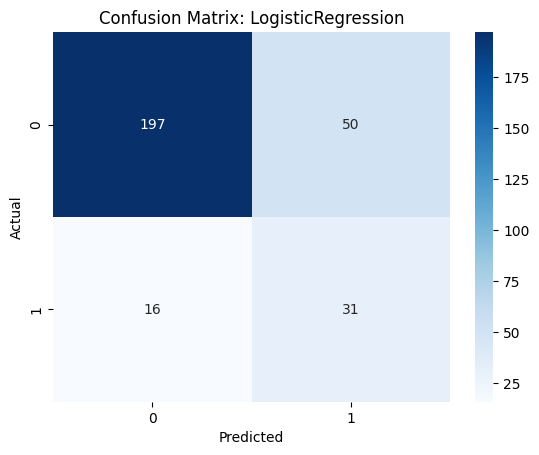

****************Classification Report****************
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       247
           1       0.38      0.66      0.48        47

    accuracy                           0.78       294
   macro avg       0.65      0.73      0.67       294
weighted avg       0.84      0.78      0.80       294

------------------------------------------------------

*************** KNeighborsClassifier ***************
******************Training Accuracy******************
0.904158215010142
*******************Testing Accuracy******************
0.6836734693877551
*******************Confusion Matrix******************


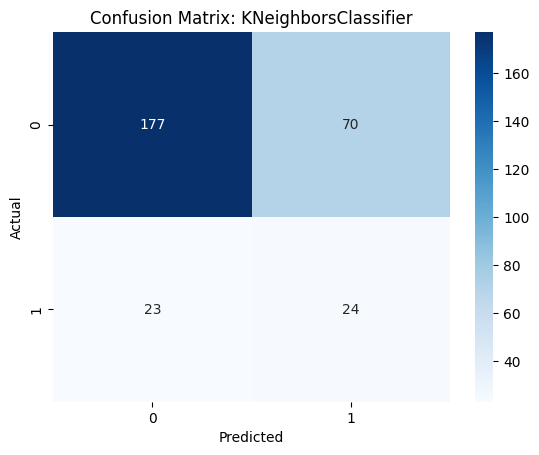

****************Classification Report****************
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       247
           1       0.26      0.51      0.34        47

    accuracy                           0.68       294
   macro avg       0.57      0.61      0.57       294
weighted avg       0.78      0.68      0.72       294

------------------------------------------------------

*************** SVM ***************
******************Training Accuracy******************
0.9619675456389453
*******************Testing Accuracy******************
0.8401360544217688
*******************Confusion Matrix******************


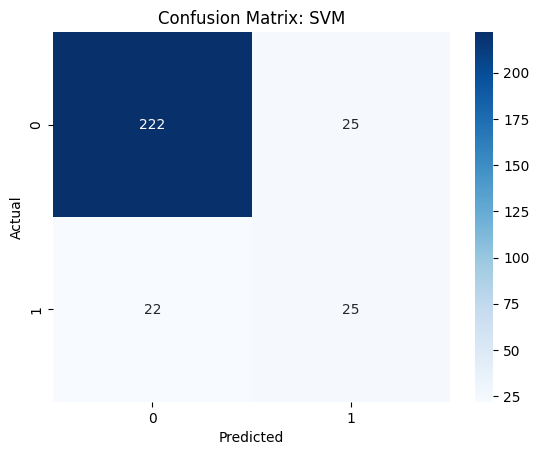

****************Classification Report****************
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       247
           1       0.50      0.53      0.52        47

    accuracy                           0.84       294
   macro avg       0.70      0.72      0.71       294
weighted avg       0.84      0.84      0.84       294

------------------------------------------------------

*************** RandomForestClassifier ***************
******************Training Accuracy******************
1.0
*******************Testing Accuracy******************
0.8435374149659864
*******************Confusion Matrix******************


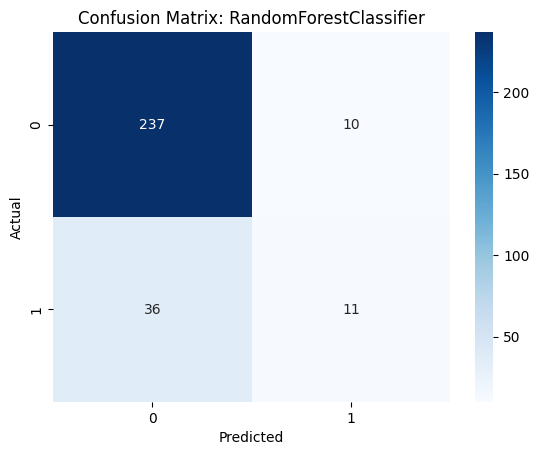

****************Classification Report****************
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.52      0.23      0.32        47

    accuracy                           0.84       294
   macro avg       0.70      0.60      0.62       294
weighted avg       0.81      0.84      0.82       294

------------------------------------------------------

*************** DecisionTreeClassifier ***************
******************Training Accuracy******************
1.0
*******************Testing Accuracy******************
0.7687074829931972
*******************Confusion Matrix******************


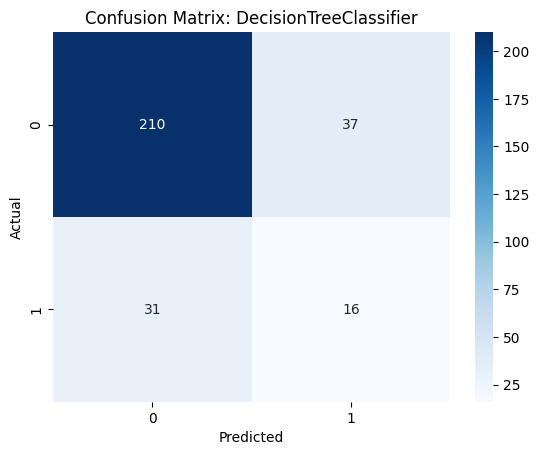

****************Classification Report****************
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       247
           1       0.30      0.34      0.32        47

    accuracy                           0.77       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.78      0.77      0.77       294

------------------------------------------------------

*************** XGBoost ***************
******************Training Accuracy******************
1.0
*******************Testing Accuracy******************
0.8571428571428571
*******************Confusion Matrix******************


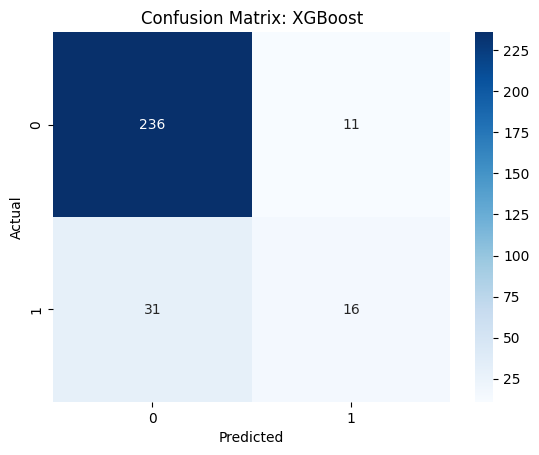

****************Classification Report****************
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.34      0.43        47

    accuracy                           0.86       294
   macro avg       0.74      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

------------------------------------------------------

*************** NaiveBayes ***************
******************Training Accuracy******************
0.6673427991886409
*******************Testing Accuracy******************
0.5136054421768708
*******************Confusion Matrix******************


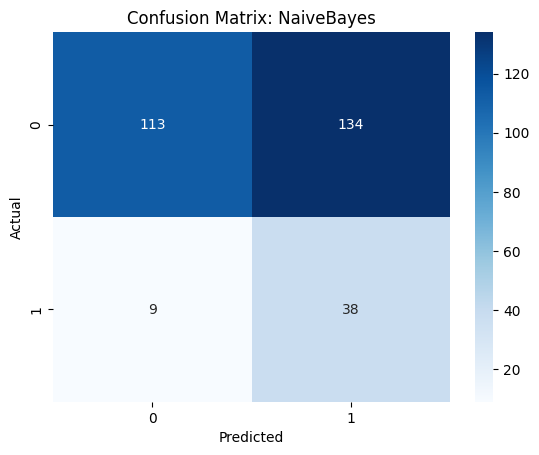

****************Classification Report****************
              precision    recall  f1-score   support

           0       0.93      0.46      0.61       247
           1       0.22      0.81      0.35        47

    accuracy                           0.51       294
   macro avg       0.57      0.63      0.48       294
weighted avg       0.81      0.51      0.57       294

------------------------------------------------------



In [45]:

# Call the function with SMOTE-balanced training data
training_model(models, X_train_resampled, X_test_scaled, y_train_resampled, y_test)

In [46]:
from sklearn.model_selection import cross_val_score


In [47]:
from sklearn.linear_model import LogisticRegression

# Use a specific model instance, e.g., LogisticRegression

model = LogisticRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.86864407 0.88085106 0.89787234 0.89361702 0.89361702]
Average Accuracy: 0.886920302921024


In [48]:
from sklearn.model_selection import cross_val_score

def training_model_cv(models, X_train_scaled, y_train):
    for modelparams in models:
        print('***************', modelparams['Name'], '***************')
        model = modelparams['model']

        # Cross-validation with 5 folds
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        print("Cross-Validation Scores:", scores)
        print("Mean Accuracy:", scores.mean())
        print('======================================================')
        print()


In [49]:
training_model_cv(models, X_train_scaled, y_train)


*************** LogisticRegression ***************
Cross-Validation Scores: [0.86864407 0.88085106 0.89787234 0.89361702 0.89361702]
Mean Accuracy: 0.886920302921024

*************** KNeighborsClassifier ***************
Cross-Validation Scores: [0.83474576 0.84680851 0.86382979 0.84255319 0.85531915]
Mean Accuracy: 0.8486512802019472

*************** SVM ***************
Cross-Validation Scores: [0.86016949 0.86808511 0.86382979 0.87234043 0.87234043]
Mean Accuracy: 0.867353047241255

*************** RandomForestClassifier ***************
Cross-Validation Scores: [0.85169492 0.88085106 0.86808511 0.87234043 0.85106383]
Mean Accuracy: 0.8648070681572305

*************** DecisionTreeClassifier ***************
Cross-Validation Scores: [0.79237288 0.7787234  0.8212766  0.76595745 0.8       ]
Mean Accuracy: 0.7916660656328884

*************** XGBoost ***************
Cross-Validation Scores: [0.84745763 0.87659574 0.87659574 0.86382979 0.85957447]
Mean Accuracy: 0.8648106743598991

**********

First 10 Predictions vs Actual (XGBoost):
   Actual  Predicted
0       0          1
1       0          0
2       0          0
3       0          0
4       1          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          1
Testing Accuracy (XGBoost): 0.8571

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.34      0.43        47

    accuracy                           0.86       294
   macro avg       0.74      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



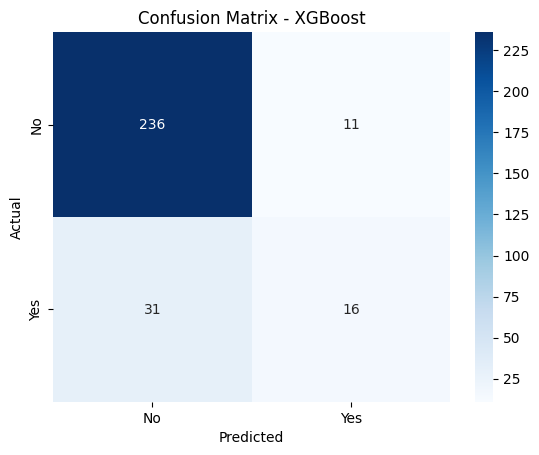

In [52]:
# Assuming the model has already been trained as follows:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Display the first 10 predictions alongside the actual values for comparison
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("First 10 Predictions vs Actual (XGBoost):")
print(comparison.head(10))

# Evaluation: Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Print accuracy
print(f"Testing Accuracy (XGBoost): {accuracy_score(y_test, y_pred):.4f}")

# Print detailed classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


First 10 Predictions vs Actual (Random Forest):
   Actual  Predicted
0       0          1
1       0          0
2       0          0
3       0          0
4       1          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          1

Testing Accuracy (Random Forest): 0.8503

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       247
           1       0.57      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.72      0.62      0.64       294
weighted avg       0.83      0.85      0.83       294



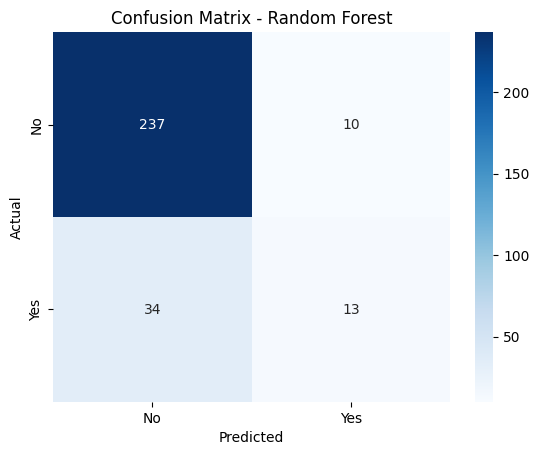

In [51]:
# Preprocessing and Model Setup (Assumed to be completed)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Display the first 10 predictions alongside actual values
comparison_rf = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})
print("First 10 Predictions vs Actual (Random Forest):")
print(comparison_rf.head(10))

# Evaluate the model
print(f"\nTesting Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf):.4f}")

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
